In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime as dt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [2]:
Rh1 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h1_DW.csv', index_col=0)
Rh2 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h2_DW.csv', index_col=0)
Rh3 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h3_DW.csv', index_col=0)
Rh5 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h5_DW.csv', index_col=0)
Rh6 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h6_DW.csv', index_col=0)
Rh7 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h7_DW.csv', index_col=0)
Rh9 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h9_DW.csv', index_col=0)
Rh10 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h10_DW.csv', index_col=0)
UKh1 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\UK_h1_DW.csv', index_col=0)
Rh13 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h13_DW.csv', index_col=0)
Rh15 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h15_DW.csv', index_col=0)
Rh16 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h16_DW.csv', index_col=0)
Rh18 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h18_DW.csv', index_col=0)
Rh20 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h20_DW.csv', index_col=0)
Rh21 = pd.read_csv(rf'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\Matrices\R_h21_DW.csv', index_col=0)

In [3]:
Rh1 = Rh1.values
Rh2 = Rh2.values
Rh3 = Rh3.values
Rh5 = Rh5.values
Rh6 = Rh6.values
Rh7 = Rh7.values
Rh9 = Rh9.values
Rh10 = Rh10.values
UKh1 = UKh1.values
Rh13 = Rh13.values
Rh15 = Rh15.values
Rh16 = Rh16.values
Rh18 = Rh18.values
Rh20 = Rh20.values
Rh21 = Rh21.values

In [4]:
UKh1.shape

(444, 1440)

In [5]:
combined = np.stack((Rh1,Rh2,Rh3,Rh5,Rh6,Rh7,Rh9,Rh10,Rh13,Rh15,Rh16,Rh18,Rh20,Rh21,UKh1))
combined.shape

(15, 444, 1440)

In [6]:
X_train, X_test = train_test_split(combined, test_size=0.28, random_state=1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
print(X_train.shape)
print(X_test.shape)

(10, 444, 1440)
(5, 444, 1440)


In [7]:
class Autoencoder(Model):
  def __init__(self, latent_dim, shape):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


shape = X_test.shape[1:]
latent_dim = 128
autoencoder = Autoencoder(latent_dim, shape)

In [8]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [9]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/20

1/1 [==============================] - 8s 8s/step - loss: 0.2500 - val_loss: 0.2499
Epoch 2/20
1/1 [==============================] - 2s 2s/step - loss: 0.2499 - val_loss: 0.2493
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.2486 - val_loss: 0.2424
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.2350 - val_loss: 0.2056
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.1764 - val_loss: 0.1263
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.1028 - val_loss: 0.0660
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.0623 - val_loss: 0.0484
Epoch 8/20
1/1 [==============================] - 1s 1s/step - loss: 0.0467 - val_loss: 0.0465
Epoch 9/20
1/1 [==============================] - 1s 1s/step - loss: 0.0399 - val_loss: 0.0467
Epoch 10/20
1/1 [==============================] - 1s 1s/step - loss: 0.0358 - val_loss: 0.0467
Epoch 11/20
1/1 [==============================]

In [10]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [11]:
decoded_imgs.shape

(5, 444, 1440)

In [12]:
print(decoded_imgs[0])

[[7.5520912e-10 1.0361384e-09 1.6020959e-09 ... 5.3246185e-10
  7.7131851e-10 3.6231478e-09]
 [1.3042997e-09 4.4943696e-10 7.6865592e-10 ... 1.9325115e-09
  1.9736435e-09 1.7541330e-09]
 [8.4604901e-10 1.1551951e-09 2.0662589e-09 ... 1.8973829e-09
  1.3261743e-09 1.1229878e-09]
 ...
 [3.4921115e-09 4.0857149e-09 7.2180723e-10 ... 3.1076608e-09
  6.2320715e-10 1.1912262e-09]
 [7.5770668e-10 3.0651526e-09 3.1647258e-09 ... 1.3944521e-09
  2.9654921e-09 2.1030977e-09]
 [5.1615086e-09 1.8982409e-09 4.4703885e-10 ... 1.5411791e-09
  1.5911541e-09 5.4918065e-10]]


In [13]:
def binary(cell):
    if cell <= 0.1:
        return 0
    elif cell >= 0.1:
        return 1

In [14]:
func = np.vectorize(binary)

In [15]:
binary0 = func(decoded_imgs[0])
binary1 = func(decoded_imgs[1])
binary2 = func(decoded_imgs[2])
binary3 = func(decoded_imgs[3])
binary4 = func(decoded_imgs[4])

In [16]:
binary = np.stack((binary0,binary1,binary2,binary3,binary4))

In [17]:
#df.to_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\DW Activations Useable\inspect.csv')

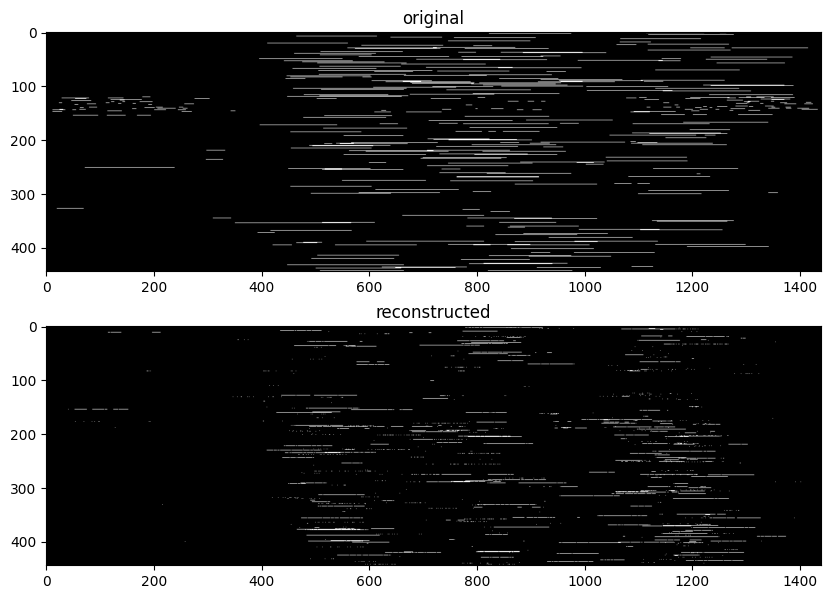

In [18]:
n = 1
plt.figure(figsize=(10,7))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i])
  plt.title("original")
  plt.gray()
  #ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)

    # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(binary[i])
  plt.title("reconstructed")
  plt.gray()
  #ax.get_xaxis().set_visible(False)
  #ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
type(decoded_imgs[0])

numpy.ndarray

In [20]:
prediction2 = np.ravel(binary2)
actual2 = np.ravel(X_test[2])

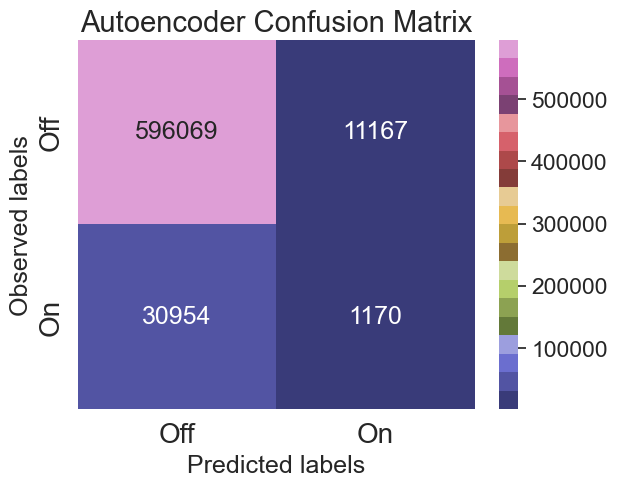

In [40]:
cm = confusion_matrix(actual2, prediction2)

ax = plt.subplot()
sns.set(font_scale=1.5) # Adjust to fit
sns.heatmap(cm, annot=True, ax=ax, cmap="tab20b", fmt="g");  

# Labels, title and ticks
label_font = {'size':'18'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font);
ax.set_ylabel('Observed labels', fontdict=label_font);

title_font = {'size':'21'}  # Adjust to fit
ax.set_title('Autoencoder Confusion Matrix', fontdict=title_font);

ax.tick_params(axis='both', which='major', labelsize=20)  # Adjust to fit
ax.xaxis.set_ticklabels(['Off', 'On']);
ax.yaxis.set_ticklabels(['Off', 'On']);
plt.show()

In [22]:
conf = confusion_matrix(actual2, prediction2)

In [23]:
print(conf)

[[596069  11167]
 [ 30954   1170]]


In [24]:
tn, fp, fn, tp = confusion_matrix(actual2, prediction2).ravel()

In [25]:
print(tn, fp, fn, tp)

596069 11167 30954 1170
